## Predictive Bank Marketing Campaign Analysis

#### This dataset can be used for 2 different goals:

Prediction of the results of the marketing campaign for each customer and clarification of factors which affect the campaign results. This helps to find out the ways how to make marketing campaigns more efficient. To optimize marketing camapigns to attract more customers to term deposit subscription.


Finding out customer segments, using data for customers, who subscribed to term deposit. This helps to identify the profile of a customer, who is more likely to acquire the product and develop more targeted marketing campaigns.


#### Finding the best strategies to improve for the next marketing campaign.

How can the financial institutions have a greater effectiveness for future marketing campaigns?

To answer this question, we  will be analyzing the last marketing campaign the bank performed and identify the  patterns that will help us find conclusions in order to develop future strategies.


This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

#### A. Attributes Description: 
#### Input variables:

##### Ai. bank client data:
1 - age: (numeric)

2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education: (categorical: primary, secondary, tertiary and unknown)

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - balance: Balance of the individual.

#### Aii. Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Aiii. other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


#### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [2]:
# Import the required libraries:

import pandas as pd  # For data munging, manipulations and preparation        
import numpy as np  # for numerical and mathematical calculations
import seaborn as sns # For statistical data visualization
import matplotlib.pyplot as plt  # For plotting variety of graphs(histograms, heatplots, lineplots
%matplotlib inline
from plotly.offline import init_notebook_mode, download_plotlyjs, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [82]:
# Import Machine Learning

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score #metrics

# tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [83]:
# Importing the DataSet and take a look at Data

bank_train= pd.read_csv("bank.csv")
bank_train.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Data Pre-Processing 

In [87]:
print("The Bank Marketing Dataset consists of")
print("Number of Rows:", bank_train.shape[0])
print("Number of Columns:", bank_train.shape[1])

The Bank Marketing Dataset consists of
Number of Rows: 11162
Number of Columns: 17


In [10]:
# Function to find the percentage of Null Values present in a data set.

def Train_missing_values(training_dataset):
    Missing_Data_Percent=pd.DataFrame(training_dataset.isna().sum())
    Missing_Data_Percent.reset_index(inplace=True)
    Missing_Data_Percent.columns=['Feild_Name','Missing_value_count']
    Missing_Data_Percent['Percent_missing_values']=Missing_Data_Percent['Missing_value_count'].\
                                                apply(lambda Missing_value_count:(Missing_value_count/len(training_dataset))*100)
    return Missing_Data_Percent.sort_values(['Percent_missing_values'],ascending=False)


Train_missing_values(bank_train)

,Feild_Name,Missing_value_count,Percent_missing_values
0,age,0,0.0
9,day,0,0.0
15,poutcome,0,0.0
14,previous,0,0.0
13,pdays,0,0.0
12,campaign,0,0.0
11,duration,0,0.0
10,month,0,0.0
8,contact,0,0.0
1,job,0,0.0


There are No Missing Values in the dataset.

In [90]:
# Check the Statistical Numerical Data Distribution Summary

bank_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


#### Summary:

Mean Age is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)

The mean balance is 1,528. However, the Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed across the dataset.

As the data information said it will be better to drop the duration column since duration is highly correlated in whether a potential client will buy a term deposit. Also, duration is obtained after the call is made to the potential client so if the target client has never received calls this feature is not that useful. The reason why duration is highly correlated with opening a term deposit is because the more the bank talks to a target client the higher the probability the target client will open a term deposit since a higher duration means a higher interest (commitment) from the potential client.

Note: There are not that much insights we can gain from the descriptive dataset since most of our descriptive data is located not in the "numeric" columns but in the "categorical columns".

#### Categorical Columns Exploration

In the dataset we have both categorical and numerical columns. Let's look at the values of categorical columns first.

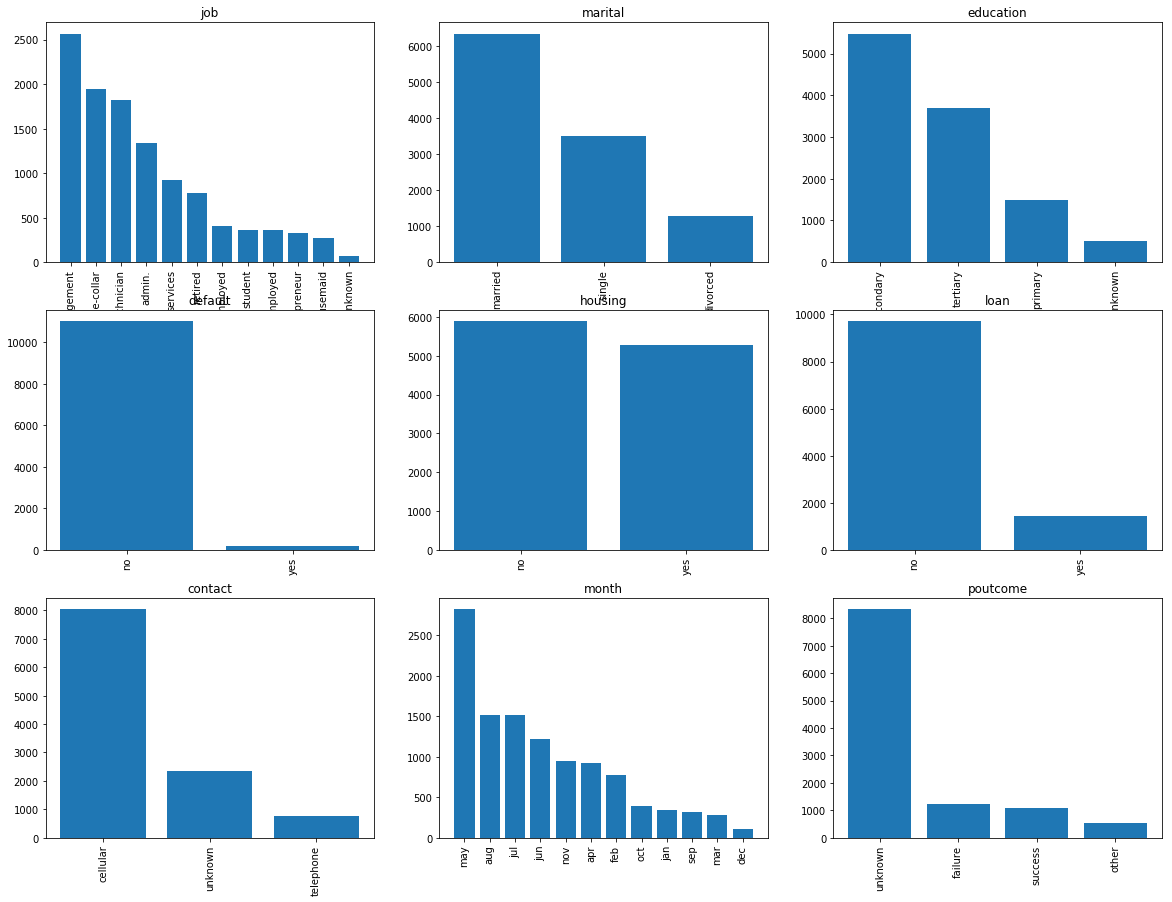

In [64]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = bank_train[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

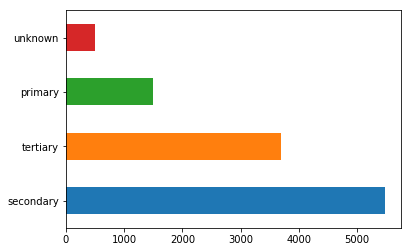

In [68]:
# Education Categories and their Frequencies

bank_train.education.value_counts().plot(kind="barh")

#### Numerical Columns Exploration


Lets look at the Numerical Columns' Values. The Most Convinient way to look at the Numerical Values is through Plotting Histograms.


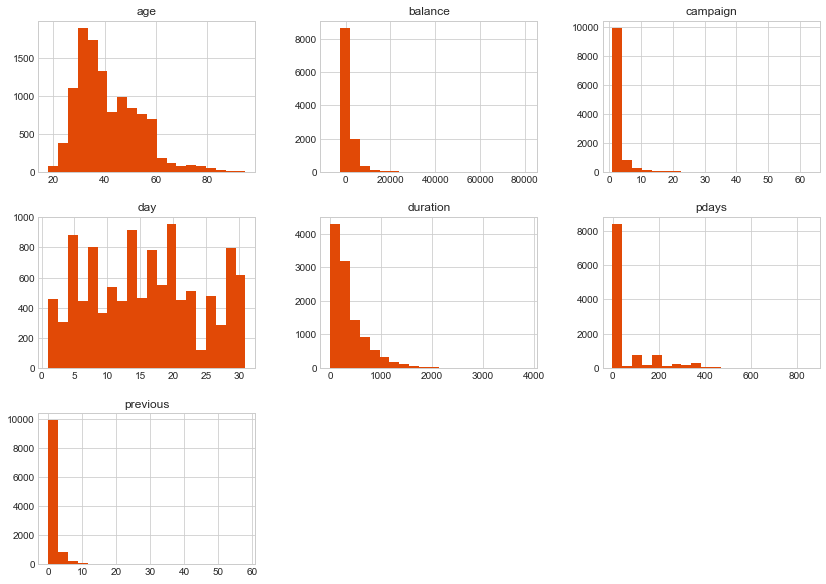

In [92]:
# Let's see how the numeric data is distributed.

plt.style.use('seaborn-whitegrid')

bank_train.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

We can see that numerical columns have outliers (especially 'pdays', 'campaign' and 'previous' columns). Possibly there are incorrect values (noisy data), so we should look closer at the data and decide how do we manage the noise.

Let's look closer at the values of 'campaign', 'pdays' and 'previous' columns:


#### The Correlation Matrix Visualization

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


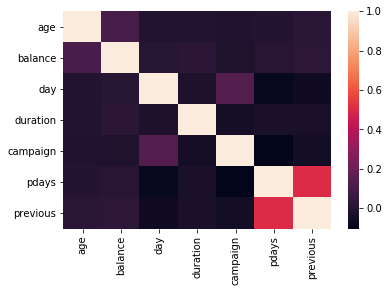

In [69]:
# The Correlation Matrix
corr = bank_train.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

#### As per the Correlation Matrix and Heatmap, Observations were made as follows:

Data is non-linear, asymmetric

Hence selection of features will not depend upon correlation factor.

Also not a single feature is correlated completely with class, hence requires combinantion of features.

Text(0.5,1,'Education Level vs Marital Status Distribution')

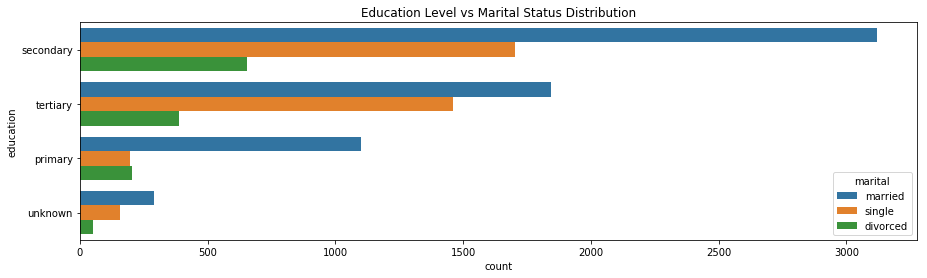

In [73]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="education", hue='marital', data=bank_train).set_title('Education Level vs Marital Status Distribution')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

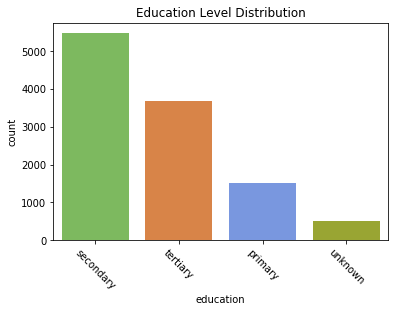

In [71]:
# Education Level Distribution
# Types of colors

color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='education', data=bank_train, palette=color_types).set_title('Education Level Distribution');
 
# Rotate x-labels
plt.xticks(rotation=-45)

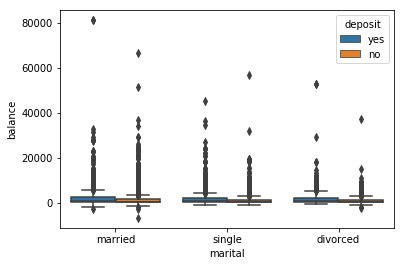

In [53]:
sns.boxplot(x="marital", y="balance", hue="deposit", data=bank_train)

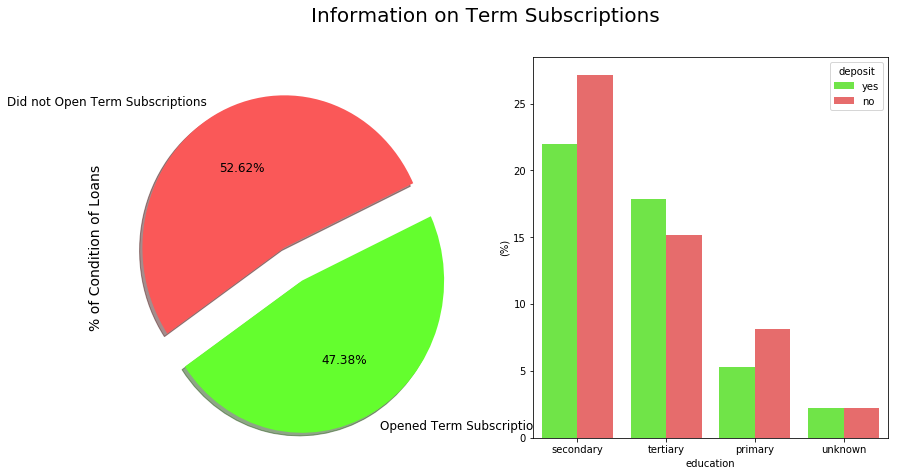

In [60]:
f, ax = plt.subplots(1,2, figsize=(14,7))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Subscriptions", "Opened Term Subscriptions"

plt.suptitle('Information on Term Subscriptions', fontsize=20)

bank_train["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="deposit", data=bank_train, palette=palette, estimator=lambda x: len(x) / len(bank_train) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(bank_train["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

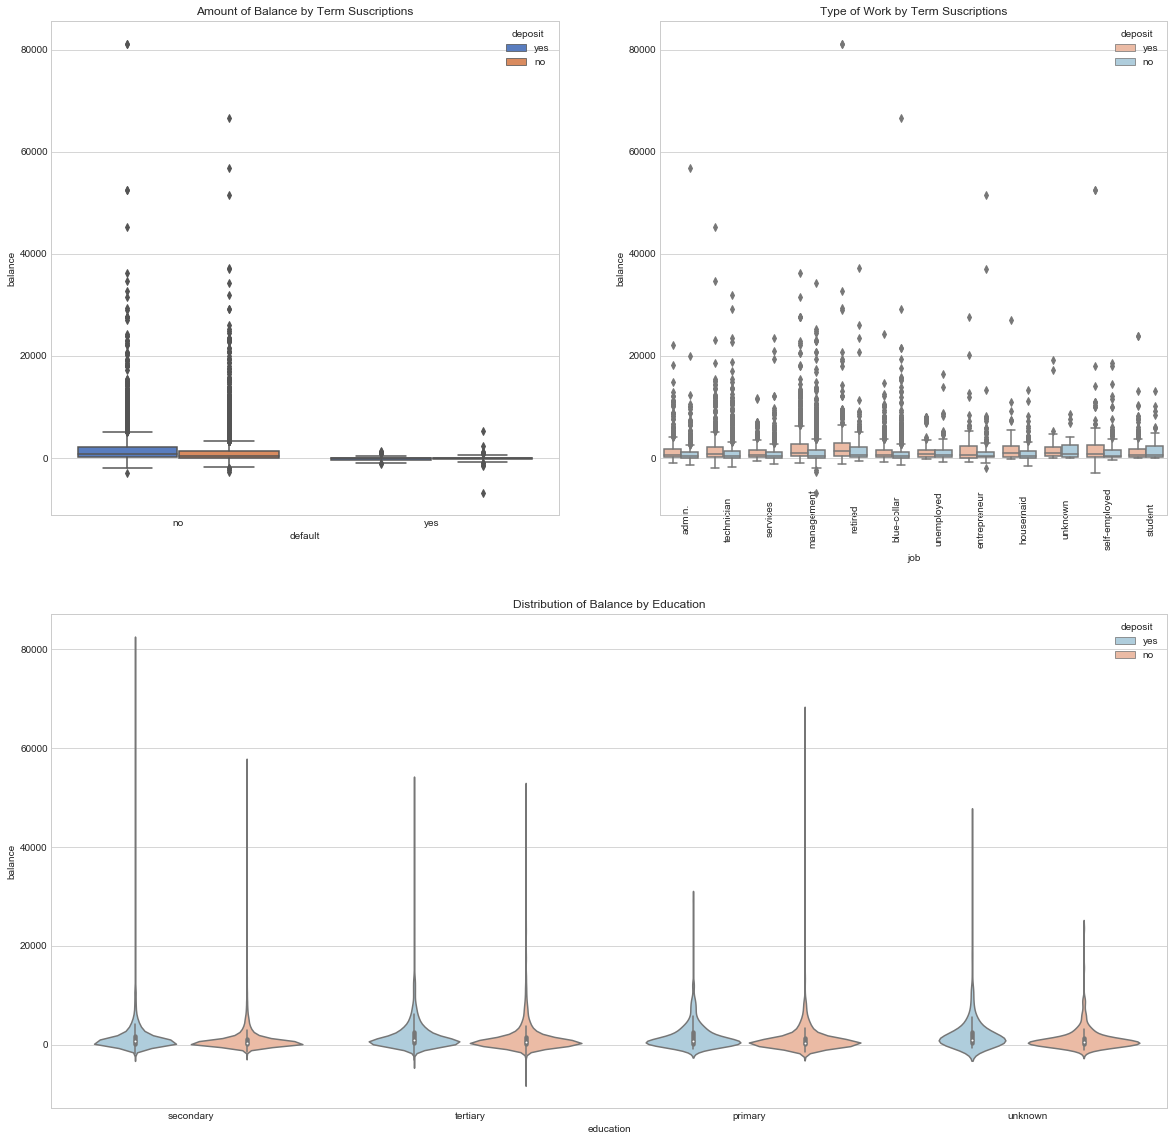

In [29]:
# plt.style.use('dark_background')
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="default", y="balance", hue="deposit",
                    data=bank_train, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Suscriptions")

# ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")

g1 = sns.boxplot(x="job", y="balance", hue="deposit",
                 data=bank_train, palette="RdBu", ax=ax2)

g1.set_xticklabels(bank_train["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")

g2 = sns.violinplot(data=bank_train, x="education", y="balance", hue="deposit", palette="RdBu_r")

g2.set_title("Distribution of Balance by Education")


plt.show()

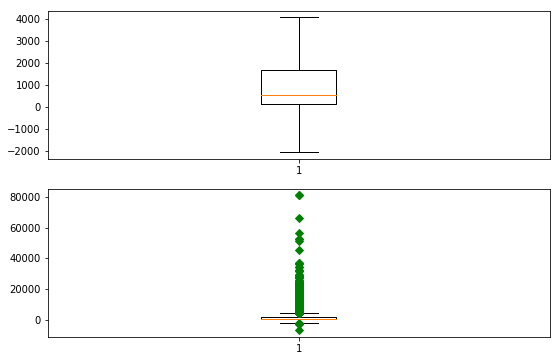

In [22]:
fig = plt.figure(1, figsize=(9, 6))
ax1 = fig.add_subplot(211)
bp1 = ax1.boxplot(bank_train.balance,0,'')
ax2 = fig.add_subplot(212)
bp2 = ax2.boxplot(bank_train.balance,0,'gD')
plt.show()

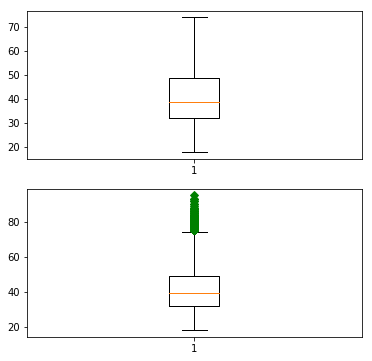

In [57]:
fig = plt.figure(1, figsize=(6, 6))
ax = fig.add_subplot(211)
bp = ax.boxplot(bank_train.age,0,'')
ax = fig.add_subplot(212)
bp = ax.boxplot(bank_train.age,0,'gD')
plt.show()

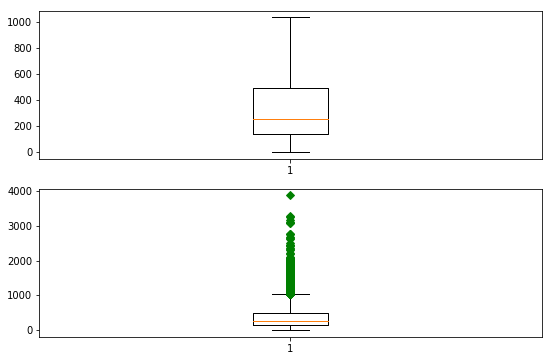

In [56]:
fig = plt.figure(1, figsize=(9, 6))
ax1 = fig.add_subplot(211)
bp1 = ax1.boxplot(bank_train.duration,0,'')
ax2 = fig.add_subplot(212)
bp2 = ax2.boxplot(bank_train.duration,0,'gD')
plt.show()

Above boxplot suggest how the data is spread across the dataset Most of the data is lying above the 3rd quantile by multiplication factor of 1.5 i.e. by theortical aspect the data points are outlier for most of the data points.

## Outlier Detection and Treatment

In [93]:
bank_train[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,11162.000000,11162.000000,11162.000000
mean,51.330407,2.508421,0.832557
std,108.758282,2.722077,2.292007
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,20.750000,3.000000,1.000000
max,854.000000,63.000000,58.000000


#### Percentage of 'pdays' values above 400:

In [94]:
len (bank_train[bank_train['pdays'] > 400] ) / len(bank_train) * 100

1.2005017022039062

pdays' holds the number of days that passed by after the client was last contacted from a previous campaign Looking closer into 'pdays' data we can see that:

only 1.2% of values above 400. They are possibly outliers, so we should consider imputing something (possibly mean value) instead of these values.
-1 possibly means that the client wasn't contacted before or stands for missing data.
Since we are not sure exactly what -1 means I suggest to drop this column, because -1 makes more than 50% of the values of the column.



#### Percentage of 'campaign' values above 20:

In [95]:
len (bank_train[bank_train['campaign'] > 34] ) / len(bank_train) * 100

0.035835871707579285

'campaign' holds the number of contacts performed during this campaign and for this client (numeric, includes last contact) Numbers for 'campaign' above 34 are clearly noise, so I suggest to impute them with average campaign values while data cleaning.

#### Percentage of 'previous' values above 20

In [96]:
len (bank_train[bank_train['previous'] > 34] ) / len(bank_train) * 100

0.04479483963447411

previous' holds the number of contacts performed before this campaign and for this client (numeric) Numbers for 'previous' above 34 are also really strange, so I suggest to impute them with average campaign values while data cleaning.



#### Analysis of the Response Column

It is very important to look at the response column, which holds the information, which we are going to predict. In our case we should look at 'deposit' column and compare its values to other columns. 
First of all we should look at the number of 'yes' and 'no' values in the response column 'deposit'.

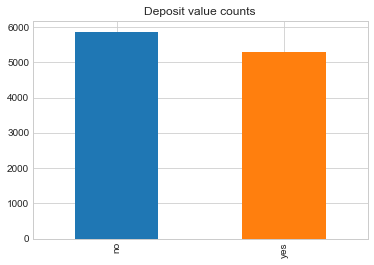

In [97]:
value_counts = bank_train['deposit'].value_counts()

value_counts.plot.bar(title = 'Deposit value counts')

On the diagram we see that counts for 'yes' and 'no' values for 'deposit' are close, so we can use accuracy as a metric for a model, which predicts the campaign outcome.

##### Let's see how 'deposit' column value varies depending on other categorical columns' values:

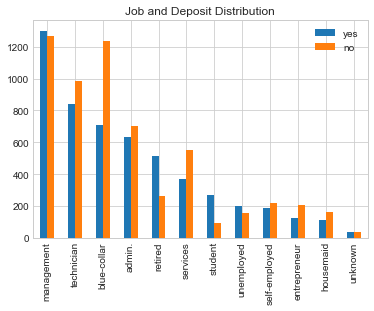

In [114]:
# Job and Deposit Distribution

j_df = pd.DataFrame()

j_df['yes'] = bank_train[bank_train['deposit'] == 'yes']['job'].value_counts()
j_df['no'] = bank_train[bank_train['deposit'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and Deposit Distribution')

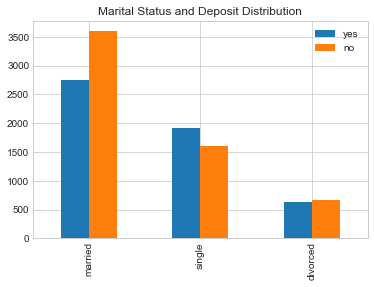

In [113]:
# Marital Status and Deposit Distribution

j_df = pd.DataFrame()

j_df['yes'] = bank_train[bank_train['deposit'] == 'yes']['marital'].value_counts()
j_df['no'] = bank_train[bank_train['deposit'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Marital Status and Deposit Distribution')

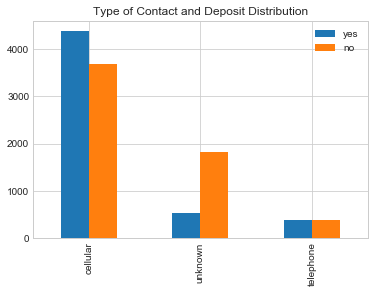

In [112]:
# Type of Contact and Deposit Distribution

j_df = pd.DataFrame()

j_df['yes'] = bank_train[bank_train['deposit'] == 'yes']['contact'].value_counts()
j_df['no'] = bank_train[bank_train['deposit'] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'Type of Contact and Deposit Distribution')

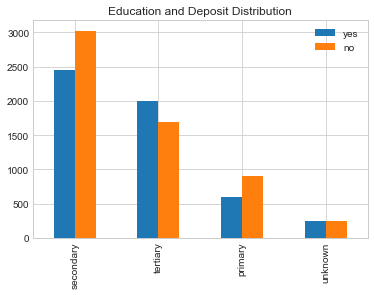

In [111]:
#education and deposit
j_df = pd.DataFrame()

j_df['yes'] = bank_train[bank_train['deposit'] == 'yes']['education'].value_counts()
j_df['no'] = bank_train[bank_train['deposit'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Education and Deposit Distribution')

#### Regarding the diagrams we can tell that according to our dataset:

Customers with 'blue-collar' and 'services' jobs are less likely to subscribe for term deposit.

Married customers are less likely to subscribe for term deposit.

Customers with 'cellular' type of contact are less likely to subscribe for term deposit.


### Now let's look how numerical columns affect term deposit subscription.

In [115]:
#balance and deposit

b_df = pd.DataFrame()
b_df['balance_yes'] = (bank_train[bank_train['deposit'] == 'yes'][['deposit','balance']].describe())['balance']
b_df['balance_no'] = (bank_train[bank_train['deposit'] == 'no'][['deposit','balance']].describe())['balance']

b_df

,balance_yes,balance_no
count,5289.000000,5873.000000
mean,1804.267915,1280.227141
std,3501.104777,2933.411934
min,-3058.000000,-6847.000000
25%,210.000000,64.000000
50%,733.000000,414.000000
75%,2159.000000,1324.000000
max,81204.000000,66653.000000


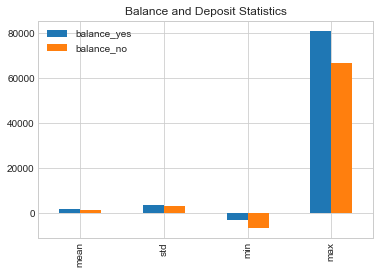

In [117]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and Deposit Statistics')

In [118]:
# Age and Deposit

a_df = pd.DataFrame()
a_df['age_yes'] = (bank_train[bank_train['deposit'] == 'yes'][['deposit','age']].describe())['age']
a_df['age_no'] = (bank_train[bank_train['deposit'] == 'no'][['deposit','age']].describe())['age']

a_df

,age_yes,age_no
count,5289.000000,5873.000000
mean,41.670070,40.837391
std,13.497781,10.264815
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,89.000000


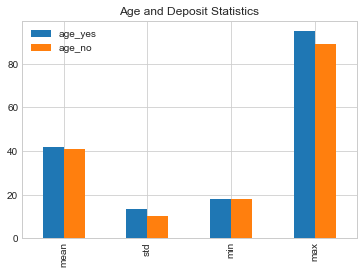

In [120]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and Deposit Statistics')

In [123]:
# Number of contacts performed during this campaign ('campaign') and deposit

c_df = pd.DataFrame()
c_df['campaign_yes'] = (bank_train[bank_train['deposit'] == 'yes'][['deposit','campaign']].describe())['campaign']
c_df['campaign_no'] = (bank_train[bank_train['deposit'] == 'no'][['deposit','campaign']].describe())['campaign']

c_df

,campaign_yes,campaign_no
count,5289.000000,5873.000000
mean,2.141047,2.839264
std,1.921826,3.244474
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


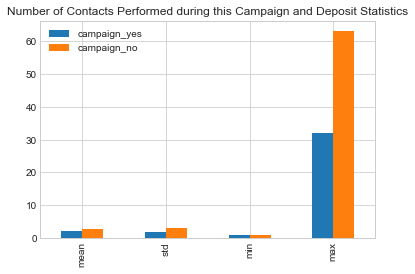

In [125]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of Contacts Performed during this Campaign and Deposit Statistics')

In [126]:
# Number of contacts performed during previous campaign ('previous') and deposit

p_df = pd.DataFrame()
p_df['previous_yes'] = (bank_train[bank_train['deposit'] == 'yes'][['deposit','previous']].describe())['previous']
p_df['previous_no'] = (bank_train[bank_train['deposit'] == 'no'][['deposit','previous']].describe())['previous']

p_df

,previous_yes,previous_no
count,5289.000000,5873.00000
mean,1.170354,0.52835
std,2.553272,1.97961
min,0.000000,0.00000
25%,0.000000,0.00000
50%,0.000000,0.00000
75%,1.000000,0.00000
max,58.000000,41.00000


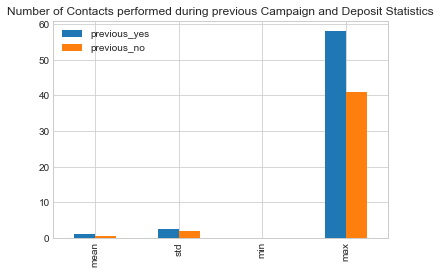

In [128]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of Contacts performed during previous Campaign and Deposit Statistics')

#### Looking at the diagrams above we can conclude that:

People who subscribed for term deposit tend to have greater balance and age values.

People who subscribed for term deposit tend to have fewer number of contacts during this campaign.

## Data Cleaning

Before we will be able to apply machine learning techniques, we should prepare the dataset for processing:

Convert columns with 'yes' and 'no' values to boolean columns;

Convert categorical columns into dummy variables.

In [154]:
def get_dummy_from_bool(row, column_name):
    ''' Returns 0 if value in column_name is no, returns 1 if value in column_name is yes'''
    return 1 if row[column_name] == 'yes' else 0

def get_correct_values(row, column_name, threshold, bank_train):
    ''' Returns mean value if value in column_name is above threshold'''
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = bank_train[bank_train[column_name] <= threshold][column_name].mean()
        return mean

def clean_data(bank_train):
    '''
    INPUT
    df - pandas dataframe containing bank marketing campaign dataset
    
    OUTPUT
    df - cleaned dataset:
    1. columns with 'yes' and 'no' values are converted into boolean variables;
    2. categorical columns are converted into dummy variables;
    3. drop irrelevant columns.
    4. impute incorrect values
    '''
    
    cleaned_df = bank_train.copy()
    
    #convert columns containing 'yes' and 'no' values to boolean variables and drop original columns
    bool_columns = ['default', 'housing', 'loan', 'deposit']
    for bool_col in bool_columns:
        cleaned_df[bool_col + '_bool'] = bank_train.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = bool_columns)
    
    #convert categorical columns to dummies
    cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
    
    for col in  cat_columns:
        cleaned_df = pd.concat([cleaned_df.drop(col, axis=1),
                                pd.get_dummies(cleaned_df[col], prefix=col, prefix_sep='_',
                                               drop_first=True, dummy_na=False)], axis=1)
    
    #drop irrelevant columns
    cleaned_df = cleaned_df.drop(columns = ['pdays'])
    
    #impute incorrect values and drop original columns
    cleaned_df['campaign_cleaned'] = bank_train.apply(lambda row: get_correct_values(row, 'campaign', 34, cleaned_df),axis=1)
    cleaned_df['previous_cleaned'] = bank_train.apply(lambda row: get_correct_values(row, 'previous', 34, cleaned_df),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = ['campaign', 'previous'])
    
    return cleaned_df

In [183]:
# Cleaning the Bank Marketing Dataset

cleaned_df = clean_data(bank_train)
cleaned_df.head(3)

,age,balance,day,duration,default_bool,housing_bool,loan_bool,deposit_bool,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,campaign_cleaned,previous_cleaned
0,59,2343,5,1042,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
1,56,45,5,1467,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
2,41,1270,5,1389,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0


## Module Building for Prediction of Campaign Outcome

### Classification model for the campaign outcome prediction

I will use the XBGoost Machine Learning Classification Model to Predict  the Cammpaign Outcome.

Resulting model will also help me to understand which features have the greatest importance for the prediction of the results of the campaign.

#####  Create X and y datasets for training the model and split into train and test datasets.

In [159]:
X = cleaned_df.drop(columns = 'deposit_bool')
y = cleaned_df[['deposit_bool']]

In [160]:
TEST_SIZE = 0.3
RAND_STATE = 42

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

In [167]:
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

#### Training the XGBoost Classifier Model:

In [168]:
# Training the XGBoost Classifier Model

xgb = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train.squeeze().values)

#calculate and print scores for the model for top 15 features
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

print('The XGB Model Accuracy Score for the trained dataset is: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))

The XGB Model Accuracy Score for the trained dataset is: 0.912: test: 0.850


#### Get the feature importances from the trained model:

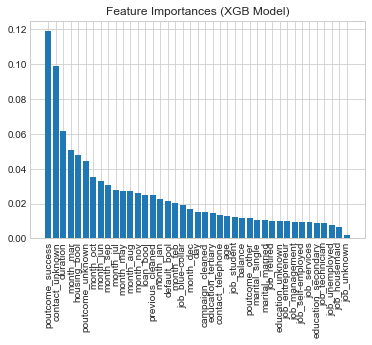

In [169]:
# Getting the Feature Importances from the Model

headers = ["name", "score"]
values = sorted(zip(X_train.columns, xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature Importances (XGB Model)')

plt.show()

##### As we can see from the diagram showing feature importances, the most important features are:

Customer's account balance,

Customer's age,

Number of contacts performed during this campaign and contact duration,

Number of contacts performed before this campaign.

##### So the main outcomes of the modelling are:

Customers of greater age are more likely to subscribe for the term deposit.

Customers with greater account balance are more likely to subscribe for the term deposit.

Number of contacts with the customers really matters. Too many contacts with the customer could make him decline the offer.


### Let's try to make more specific recommendations:

#### 1. Find out account balance, which marketing campaign should focus on:

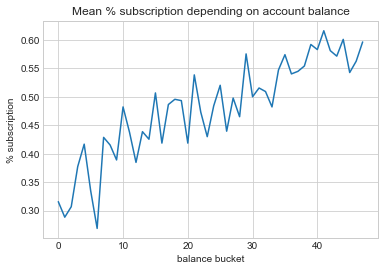

In [182]:
df_new = cleaned_df.copy()

# Introducing a New Column 'balance_buckets' to ''


df_new['balance_buckets'] = pd.qcut(df_new['balance'], 50, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_deposit = df_new.groupby(['balance_buckets'])['deposit_bool'].mean()

#plot
plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('Mean % subscription depending on account balance')
plt.xlabel('balance bucket')
plt.ylabel('% subscription')
plt.show()

In [173]:
df_new[df_new['balance_buckets'] == 34]['balance'].min()

1490

From the diagram above we can conclude, that marketing campaigns should concentrate on customers with account balance greater than 1490$.

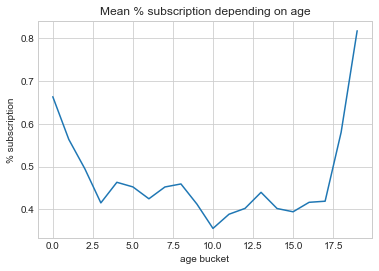

In [181]:
# Introducing A New Column 'Age_buckets' to ''

df_new['age_buckets'] = pd.qcut(df_new['age'], 20, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_age = df_new.groupby(['age_buckets'])['deposit_bool'].mean()

#plot
plt.plot(mean_age.index, mean_age.values)
plt.title('Mean % subscription depending on age')
plt.xlabel('age bucket')
plt.ylabel('% subscription')
plt.show()

In [176]:
df_new[df_new['age_buckets'] == 3]['age'].max()

31

In [177]:
df_new[df_new['age_buckets'] == 17]['age'].min()

56

So we see that average subscrition rate tends to be higher for customers below 31 years old or above 56 years old.

#### 1. Find out appropriate number of contacts with the customer during campaign:

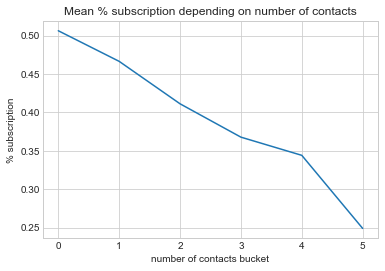

In [180]:
# Introducing a New Column "Age_buckets" to ''

df_new['campaign_buckets'] = pd.qcut(df_new['campaign_cleaned'], 20, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_campaign = df_new.groupby(['campaign_buckets'])['deposit_bool'].mean()

#plot average campaign outcome per bucket 
plt.plot(mean_campaign.index, mean_campaign.values)
plt.title('Mean % subscription depending on number of contacts')
plt.xlabel('number of contacts bucket')
plt.ylabel('% subscription')
plt.show()

In [179]:
df_new[df_new['campaign_buckets'] == 2]['campaign_cleaned'].min()

4.0

From the plot above we see that average subscription rate is below 50% if the number of contacts during the campaign exceeds 4.

## Conclusion and Summary


#### Key outcomes of the analysis are the recommendations for future marketing campaigns:

The customer's account balance has a huge influence on the campaign's outcome. People with account balance above 1490$ are more likely to subscribe for term deposit, so future address those customers.

The customer's age affects campaign outcome as well. Future campains should concentrate on customers from age categories below 30 years old and above 50 years old.

Number of contacts with the customer during the campaign is also very important. The number of contacts with the customer shouldn't exceed 4.